In [6]:
import pynbody
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
!ls /public/projects/simulation/cola_output_nstep20/snp00001.*


/public/projects/simulation/cola_output_nstep20/snp00001.0
/public/projects/simulation/cola_output_nstep20/snp00001.1
/public/projects/simulation/cola_output_nstep20/snp00001.10
/public/projects/simulation/cola_output_nstep20/snp00001.11
/public/projects/simulation/cola_output_nstep20/snp00001.12
/public/projects/simulation/cola_output_nstep20/snp00001.13
/public/projects/simulation/cola_output_nstep20/snp00001.14
/public/projects/simulation/cola_output_nstep20/snp00001.15
/public/projects/simulation/cola_output_nstep20/snp00001.16
/public/projects/simulation/cola_output_nstep20/snp00001.17
/public/projects/simulation/cola_output_nstep20/snp00001.18
/public/projects/simulation/cola_output_nstep20/snp00001.19
/public/projects/simulation/cola_output_nstep20/snp00001.2
/public/projects/simulation/cola_output_nstep20/snp00001.20
/public/projects/simulation/cola_output_nstep20/snp00001.21
/public/projects/simulation/cola_output_nstep20/snp00001.22
/public/projects/simulation/cola_output_nst

In [11]:
data = pynbody.load('/public/projects/simulation/cola_output_cita/snp00001p.0')
pos = data['pos']
print pos

[[3.4693763e+00 2.2384539e-01 3.3033243e-01]
 [4.0395555e+00 6.7698717e-01 7.1951991e-01]
 [3.3452477e+00 7.1066177e-01 2.0247491e-01]
 ...
 [2.2754553e+01 7.9995319e+02 7.9979816e+02]
 [2.3466660e+01 7.9674609e+02 7.9970709e+02]
 [2.2209719e+01 7.9994000e+02 7.9997406e+02]]


In [12]:
data.properties

{'a': 1.0,
 'boxsize': Unit("8.00e+02 Mpc a h**-1"),
 'h': 0.6880620121955872,
 'omegaL0': 0.7048740088939667,
 'omegaM0': 0.2951259911060333,
 'time': Unit("9.69e-03 s Mpc a**1/2 h**-1 km**-1")}

In [13]:
data.loadable_keys()

['iord', 'mass', 'pos', 'vel']

[[3.4693763e+00 2.2384539e-01 3.3033243e-01]
 [4.0395555e+00 6.7698717e-01 7.1951991e-01]
 [3.3452477e+00 7.1066177e-01 2.0247491e-01]
 ...
 [2.2754553e+01 7.9995319e+02 7.9979816e+02]
 [2.3466660e+01 7.9674609e+02 7.9970709e+02]
 [2.2209719e+01 7.9994000e+02 7.9997406e+02]]


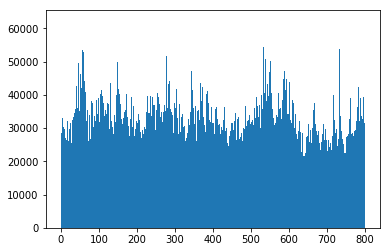

In [5]:
pos = data['pos']
print pos
vel = data['vel']
mass = data['mass']
X = [pos[row][2] for row in range(len(pos))]
plt.hist(X, bins=1000);

In [14]:
X = [xx for xx in pos[0]] + [xx for xx in vel[0]] + [mass[0]]
nowstr = ''
for xx in X: nowstr += (str(xx)+' ')
print X
print nowstr

[3.4693763, 0.22384539, 0.33033243, 218.60814, 53.251755, -19.75769, 3.904542]
3.4693763 0.22384539 0.33033243 218.60814 53.251755 -19.75769 3.904542 


In [ ]:
for snapnum,  in 'abcdefghijk', range(0,10):

In [2]:
for snapnum in enumerate( 'abcdefghijk'):
    print snapnum

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')
(5, 'f')
(6, 'g')
(7, 'h')
(8, 'i')
(9, 'j')
(10, 'k')


In [ ]:
for outputsnapnum, snapnum in enumerate('abcdefghijk'):
    snapnum = '00001'+snapnum; outsnapnum = '%02i'%outputsnapnum
    
    randratio = 0.0027

    randseed = 0

    outputfile = '/public/projects/simulation/cola_output_cita/cola_cita_'+outsnapnum
    print outputsnapnum, snapnum, outputfile
    #continue
    ###################################
    ### Run

    # names of the 32 files
    files = ['/public/projects/simulation/cola_output_cita/snp'+snapnum+'.'+str(row) 
             for row in range(32) ]

    # open outputfile for write
    outputf = open(outputfile, 'w')

    # open all input files for read & select
    np.random.seed(randseed)
    num_selected_total = 0
    for nowfile in files:
    #for nowfile in files:
        data = pynbody.load(nowfile)
        pos, vel, mass = data['pos'], data['vel'], data['mass']
        npar = len(pos); num_selected = 0
        print 'Processing', npar, 'particles in  file ', nowfile, '...'
        ## 枚举所有particle
        for ipar in range(npar):
            nowrandom = np.random.uniform()
            if nowrandom < randratio:
                num_selected +=1; num_selected_total +=1
                X = [xx for xx in pos[ipar]] + \
                [xx for xx in vel[ipar]] # + [mass[ipar]]
                nowstr = ''
                for xx in X: nowstr += (str(xx)+' ')
                outputf.write(nowstr+'\n')
        print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

    # Finish.
    outputf.close()

0 00001a /public/projects/simulation/cola_output_cita/cola_cita_00
Processing 33679913 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.0 ...
	Done. #-selected (this file, total):  91487 91487
Processing 33408083 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.1 ...
	Done. #-selected (this file, total):  89853 181340
Processing 33392100 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.2 ...
	Done. #-selected (this file, total):  90301 271641
Processing 33784004 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.3 ...
	Done. #-selected (this file, total):  91165 362806
Processing 34604787 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.4 ...
	Done. #-selected (this file, total):  93079 455885
Processing 34490672 particles in  file  /public/projects/simulation/cola_output_cita/snp00001a.5 ...
	Done. #-selected (this file, total):  92638 548523
Processing 34175

In [17]:
snapnum = '00001o'
outsnapnum = '014'

randratio = 0.0027

randseed = 0

outputfile = '/public/projects/simulation/cola_output_cita/cola_cita_'+outsnapnum
    

###################################
### Run

# names of the 32 files
files = ['/public/projects/simulation/cola_output_cita/snp'+snapnum+'.'+str(row) 
         for row in range(32) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected +=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
            [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 33747651 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.0 ...
	Done. #-selected (this file, total):  91696 91696
Processing 33351357 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.1 ...
	Done. #-selected (this file, total):  89670 181366
Processing 33328128 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.2 ...
	Done. #-selected (this file, total):  90115 271481
Processing 33796168 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.3 ...
	Done. #-selected (this file, total):  91206 362687
Processing 35592474 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.4 ...
	Done. #-selected (this file, total):  95694 458381
Processing 35389390 particles in  file  /public/projects/simulation/cola_output_cita/snp00001o.5 ...
	Done. #-selected (this file, total):  95182 553563
Processing 34476486 particles in  file  /public/projects/simulation/cola_output_cit

In [18]:
snapnum = '00001n'
outsnapnum = '013'

randratio = 0.0027

randseed = 0

outputfile = '/public/projects/simulation/cola_output_cita/cola_cita_'+outsnapnum
    

###################################
### Run

# names of the 32 files
files = ['/public/projects/simulation/cola_output_cita/snp'+snapnum+'.'+str(row) 
         for row in range(32) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected +=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
            [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 33742774 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.0 ...
	Done. #-selected (this file, total):  91683 91683
Processing 33352477 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.1 ...
	Done. #-selected (this file, total):  89677 181360
Processing 33343921 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.2 ...
	Done. #-selected (this file, total):  90153 271513
Processing 33787827 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.3 ...
	Done. #-selected (this file, total):  91187 362700
Processing 35495641 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.4 ...
	Done. #-selected (this file, total):  95432 458132
Processing 35294151 particles in  file  /public/projects/simulation/cola_output_cita/snp00001n.5 ...
	Done. #-selected (this file, total):  94929 553061
Processing 34452034 particles in  file  /public/projects/simulation/cola_output_cit

In [19]:
snapnum = '00001m'
outsnapnum = '012'

randratio = 0.0027

randseed = 0

outputfile = '/public/projects/simulation/cola_output_cita/cola_cita_'+outsnapnum
    

###################################
### Run

# names of the 32 files
files = ['/public/projects/simulation/cola_output_cita/snp'+snapnum+'.'+str(row) 
         for row in range(32) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected +=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
            [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 33737740 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.0 ...
	Done. #-selected (this file, total):  91665 91665
Processing 33357988 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.1 ...
	Done. #-selected (this file, total):  89695 181360
Processing 33348124 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.2 ...
	Done. #-selected (this file, total):  90167 271527
Processing 33784021 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.3 ...
	Done. #-selected (this file, total):  91175 362702
Processing 35409895 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.4 ...
	Done. #-selected (this file, total):  95201 457903
Processing 35189488 particles in  file  /public/projects/simulation/cola_output_cita/snp00001m.5 ...
	Done. #-selected (this file, total):  94632 552535
Processing 34438729 particles in  file  /public/projects/simulation/cola_output_cit

In [20]:
snapnum = '00001l'
outsnapnum = '011'

randratio = 0.0027

randseed = 0

outputfile = '/public/projects/simulation/cola_output_cita/cola_cita_'+outsnapnum
    

###################################
### Run

# names of the 32 files
files = ['/public/projects/simulation/cola_output_cita/snp'+snapnum+'.'+str(row) 
         for row in range(32) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected +=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
            [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 33735242 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.0 ...
	Done. #-selected (this file, total):  91657 91657
Processing 33364109 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.1 ...
	Done. #-selected (this file, total):  89709 181366
Processing 33351990 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.2 ...
	Done. #-selected (this file, total):  90185 271551
Processing 33783657 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.3 ...
	Done. #-selected (this file, total):  91176 362727
Processing 35323432 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.4 ...
	Done. #-selected (this file, total):  94952 457679
Processing 35093971 particles in  file  /public/projects/simulation/cola_output_cita/snp00001l.5 ...
	Done. #-selected (this file, total):  94366 552045
Processing 34417749 particles in  file  /public/projects/simulation/cola_output_cit